In [1]:
import os
import nibabel as nib
import skimage.io as io
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image,ImageOps
import skimage

In [2]:
classes = ['background','CSF','GM','WM']

# RGB color for each class
colormap = [[0,0,0],[85,85,85],[170,170,170], [255,255,255]]

len(classes), len(colormap)

(4, 4)

建立一个索引，将一个类别的 RGB 值对应到一个整数上

这种一一对应的关系，将 label 图片变成一个和原图片一样大的矩阵，但是只有两个维度，里面的每个数值代表着像素的类别

In [3]:
cm2lbl = np.zeros(256**3) # 每个像素点有 0 ~ 255 的选择，RGB 三个通道
for i,cm in enumerate(colormap):
    cm2lbl[(cm[0]*256+cm[1])*256+cm[2]] = i # 建立索引

def image2label(img):
    data = np.array(img, dtype='int32')
    idx = (data[:, :, 0] * 256 + data[:, :, 1]) * 256 + data[:, :, 2]
    return np.array(cm2lbl[idx], dtype='int64') # 根据索引得到 label 矩阵

----
验证一下

先读入一张标签图像

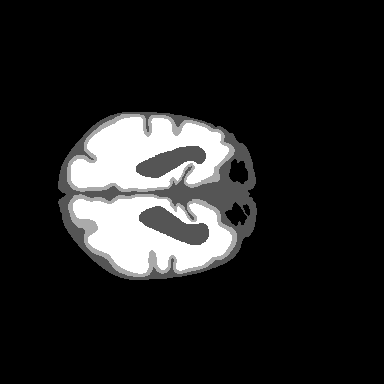

In [28]:
label_im = Image.open('./M/class/(68).bmp').convert('RGB')
label_im

In [29]:
label_im.save('label.bmp')

将标签图像转换成标签矩阵

In [5]:
label = image2label(label_im)
label.shape

(384, 384)

标签矩阵的大小即为原图大小

----

输出标签矩阵的一部分

In [6]:
label[110:130, 140:160]

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2],
       [2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
       [3, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
       [3, 3, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3],
       [3, 3, 3, 2, 2, 2, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3],
       [3, 3, 3, 2, 2, 2, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3],
       [3, 3, 3, 2, 2, 2, 1, 1, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [3, 3, 3, 2, 2, 2, 1, 1, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [3, 3, 3, 2, 2, 2, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3],
       [3, 3, 3, 2, 2, 2, 1, 1, 2,

In [7]:
classes = ['background','CSF','GM','WM']

# RGB color for each class
colormap_new = [[0,0,0],[238,99,99],[30,144,255], [255,239,219]]

len(classes), len(colormap)

(4, 4)

In [14]:
#印度红、深蓝、天蓝
classes = ['background','CSF','GM','WM']

# RGB color for each class
colormap_new1 = [[0,0,0],[255,106,106],[16,78,139], [240,255,255]]

len(classes), len(colormap)

(4, 4)

In [19]:
#品红、蓝、雪白
classes = ['background','CSF','GM','WM']

# RGB color for each class
colormap_new2 = [[0,0,0],[255,0,255],[0,0,255], [255,250,250]]

len(classes), len(colormap)

(4, 4)

In [24]:
lbl2img = np.zeros((384,384,3))
for i in range(384):
    for j in range(384):     
        lbl2img[i][j]=colormap_new2[label[i,j].astype(int)]

In [25]:
print(lbl2img.shape)

(384, 384, 3)


转换成RGB图像

In [26]:
new_im1 = Image.fromarray(lbl2img.astype(np.uint8))

In [27]:
new_im1
new_im1.save('color_change1.bmp')